# machine learning

Starting point for ml question

In [3]:
# initial inputs
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# random state for reproducible results
random_state = 42

## data analysis

read and analyze data

read in dataframe

In [4]:
orig_df = pd.read_csv('./news_market_data.csv', index_col="Date")
orig_df.head()

,label,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_22,topic_23,topic_24,topic_25,open,high,low,close,volume,adj close
Date,,,,,,,,,,,,,,,,,,,,,
2009-07-22,0,Israeli cell phone ad shows friendly game of I...,Chevron getting hit with $27B fine for destroy...,Human rights activist Natalia Estemirova was t...,Israel cuts 1948 'catastrophe' from Arabic tex...,Darkness envelops Asia during total eclipse',"Amnesty: Saudi Arabia is holding more than 3,0...",Because of ethnocentric Israeli land ownership...,Amnesty International has strongly criticised ...,France has summoned the Israeli ambassador in ...,...,"They want to turn these guys into assassins, a...",Clinton urges irreversible steps from N. Korea...,Ahmadinejad creating a rift with Supreme Leade...,Study: Mexican immigration to U.S. drops ',8912.389648,8949.799805,8860.320312,8881.259766,199010000,8881.259766
2009-07-23,1,New Jersey mayors and rabbis arrested for invo...,South Korean unions prepare for general strike...,Four-year-old Samar Abed Rabbu was paralyzed a...,Swine flu: Country by Country',One cleric's legacy of peace,Dutch return severed head of Ghana chief',The new Nepalese government has announced its ...,Iceland submits EU membership bid',Israel on 'collision course' with Washington -...,...,"Murders, rapes and major internal displacement...",12 Israelis nabbed for US lottery fraud',Big turnout expected in hotly contested Iraqi ...,"About 100,000 people caught swine flu in Engla...",8882.309570,9096.719727,8866.440430,9069.290039,274760000,9069.290039
2009-07-24,1,26/11 Mumbai Attacks - Documentary footage wit...,Blind rescue dog has 'guide dog',"Netanyahu, battling Obama, says that everyone ...",North Korea accused of testing biological / ch...,WikiLeaks victorious over corruption report ga...,Archaeologists have found five well-preserved ...,One of the incriminating tapes of Italy's PM S...,Two new Mozart works discovered by foundation',"Russian telecom executives testify that Skype,...",...,"Iceland formally applies for EU membership, ho...",Drug-Dealing for Jesus: Mexico's Evangelical N...,After Israel's housing minister called on Jews...,Female police hottie named Alison Minards had ...,9066.110352,9100.879883,9007.389648,9093.240234,214310000,9093.240234
2009-07-27,1,"To fool the parents of the victims, the childr...",After being kidnapped at the age of 16 by a gr...,The future Iran. The protest continues and the...,Private steel manufacturer in China decides to...,An African nation of 3 million people successf...,The Death of Handwriting',Rabbi Rosenbaum was the US broker for an inter...,College degrees/grades are stolen and sold to ...,The limits of freedom: In theory we are free t...,...,Oh the irony: Jews protest Arab construction i...,Russian Serious With Action Against Convicted ...,One Sixth of Humanity Is Hungry - UN',Skype singled out as threat to Russia's securityn,9093.089844,9123.400391,9034.519531,9108.509766,176830000,9108.509766
2009-07-28,0,British police wants DNA database of everyone ...,The lives of women are secondary: in Nicaragua...,For the first time in its history British Army...,Greece prevented it from joining the United Na...,17 year old girl given life sentence in Canada...,FOXNews: Egypt annexes Iraq',"Female British police issued headscarves, so a...",Nigerian Taliban kill 200 since Sunday in thei...,German brothels learn something from all-you-c...,...,A father and his two sons who made up to 7m fr...,The Pirate Bay gets sued. Again.',Cheesemakers in space flight bid',Iran's Ayatollah Ali Khamenei has ordered the ...,9106.919922,9124.910156,9007.469727,9096.719727,198270000,9096.719727


shape of overall dataframe

In [5]:
print(f'shape: {orig_df.shape}')

shape: (1000, 32)


get correlation matrix

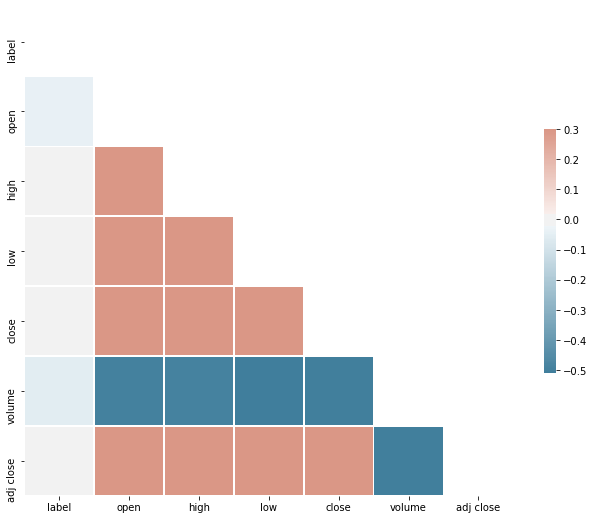

In [6]:
corr = orig_df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

scatter and density plots

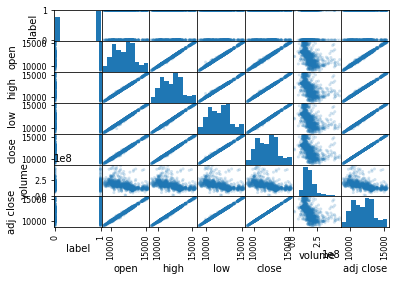

In [7]:
pd.plotting.scatter_matrix(orig_df, alpha=0.2)
plt.show()

## data cleaning

pre-process input data

create new dataframe with combined input sentences (for training)

In [8]:
text_columns = orig_df.columns[1:26]
print(text_columns.tolist())
combined_sentences_df = orig_df.drop(columns=text_columns).join(
    pd.DataFrame(orig_df[text_columns].apply(lambda data:' '.join(data.values.astype(str)), axis=1), columns=['combined'])
)
combined_sentences_df.head(2)

['topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10', 'topic_11', 'topic_12', 'topic_13', 'topic_14', 'topic_15', 'topic_16', 'topic_17', 'topic_18', 'topic_19', 'topic_20', 'topic_21', 'topic_22', 'topic_23', 'topic_24', 'topic_25']


,label,open,high,low,close,volume,adj close,combined
Date,,,,,,,,
2009-07-22,0,8912.389648,8949.799805,8860.320312,8881.259766,199010000,8881.259766,Israeli cell phone ad shows friendly game of I...
2009-07-23,1,8882.309570,9096.719727,8866.440430,9069.290039,274760000,9069.290039,New Jersey mayors and rabbis arrested for invo...


remove stopwords. stopwords are words like “he”, “the”, “is”, which are not very informative in representing the cinformation in a given sentence (and therefore should be avoided).

In [9]:
import nltk
nltk.download('stopwords')
print(nltk.corpus.stopwords.words('english')[2:5])

['my', 'myself', 'we']


[nltk_data] Downloading package stopwords to /home/joshua/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
from string import punctuation

def clean_str(data: str):
    """
    remove punctuation in given sentence
    """
    remove_punctuation = [ch for ch in data if ch not in punctuation]
    # convert back to sentences, split to words
    remove_punctuation = ''.join(remove_punctuation).split()
    filtered_words = [word.lower() for word in remove_punctuation if word.lower() not in nltk.corpus.stopwords.words('english')]
    return ' '.join(filtered_words)

create df with combined sentences

In [11]:
clean_df = combined_sentences_df.copy()
clean_df.loc[:, 'combined'] = clean_df['combined'].apply(clean_str)

create training and testing data

In [12]:
print(f'shape: {clean_df.shape}')
clean_df.head(2)

shape: (1000, 8)


,label,open,high,low,close,volume,adj close,combined
Date,,,,,,,,
2009-07-22,0,8912.389648,8949.799805,8860.320312,8881.259766,199010000,8881.259766,israeli cell phone ad shows friendly game isra...
2009-07-23,1,8882.309570,9096.719727,8866.440430,9069.290039,274760000,9069.290039,new jersey mayors rabbis arrested involvement ...


In [13]:
train_data = clean_df.iloc[:800]
test_data = combined_sentences_df.iloc[600:]
train_data.shape, test_data.shape

((800, 8), (400, 8))

ngrams (vectorizing input sentences)

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(ngram_range=(2,2), max_features=100000)

In [15]:
train_vectorized = count_vectorizer.fit_transform(train_data['combined'])
test_vectorized = count_vectorizer.transform(test_data['combined'])
test_vectorized

<400x100000 sparse matrix of type '<class 'numpy.int64'>'
	with 41271 stored elements in Compressed Sparse Row format>